<a href="https://colab.research.google.com/github/atull31/atull31/blob/main/DSMajProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Project to predict if client will subcribe to term deposit or not

In [ ]:
#Imported required libraries

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank-full (1).csv to bank-full (1).csv


In [ ]:
data = pd.read_csv('bank-full (1).csv', delimiter=';', quotechar='"')

In [ ]:
#getting unique data for every accessible and required column
unique = data['age'].unique()
print(unique)

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]


In [ ]:
#getting range of certain columns
min = data['previous'].min()
max = data['previous'].max()
print(f"{min} to {max}")

0 to 275


In [ ]:
#top 5 rows
print(data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [ ]:
print(data.shape)

(45211, 17)


In [ ]:
data.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df = pd.DataFrame(data)

In [ ]:
#excel file for description  of data
df = pd.DataFrame(data)
describe_df = df.describe()
styled_df = describe_df.style.background_gradient(cmap='viridis')
# Save the styled DataFrame to an Excel file
styled_df.to_excel('styled_describe.xlsx', engine='openpyxl', index=True)

<ipython-input-110-67f5a22b11e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<Axes: xlabel='age', ylabel='Density'>

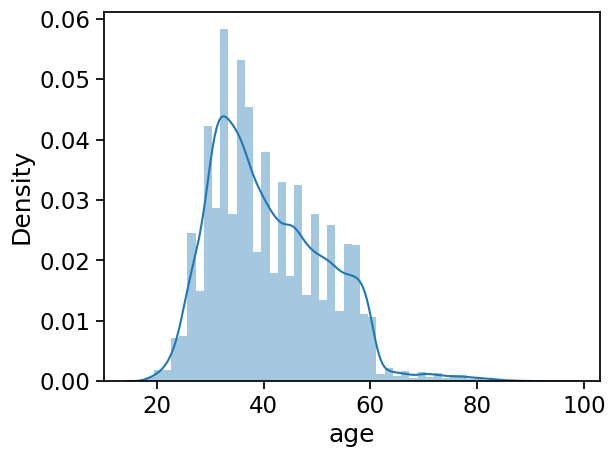

In [ ]:
sns.distplot(data['age']) #histogram of age

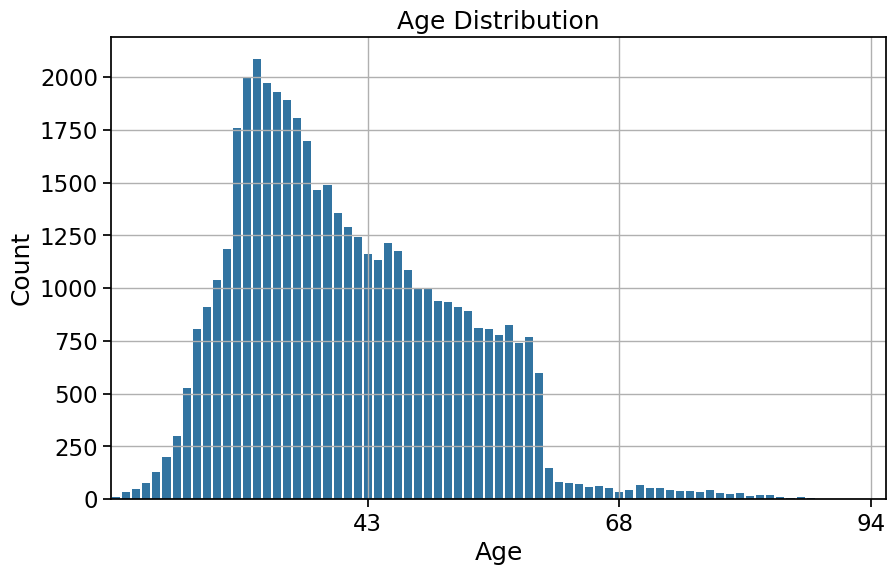

In [ ]:
#age bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks([25,50,75])
plt.grid(True)
plt.show()

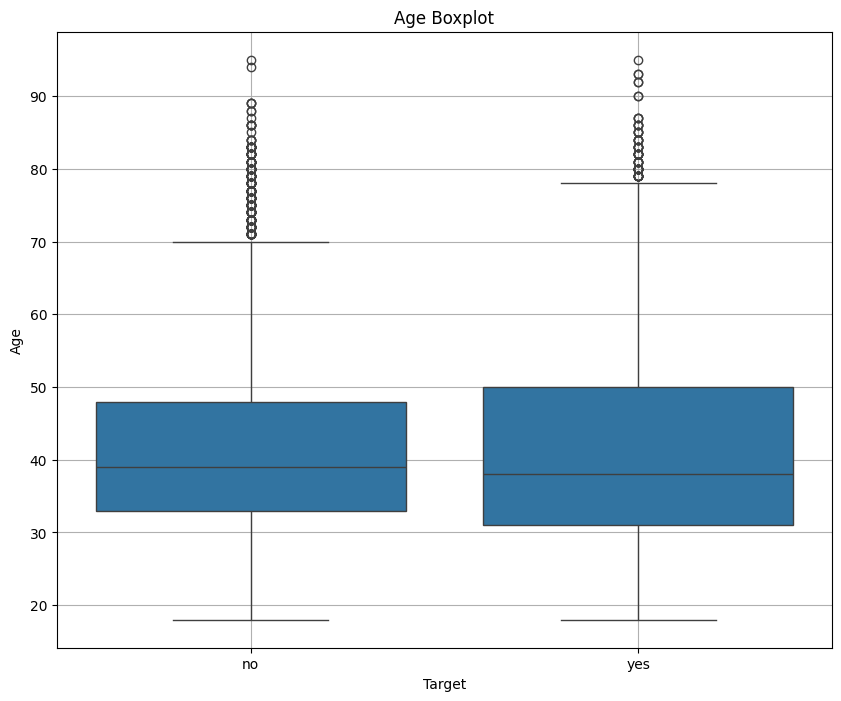

In [ ]:
#boxplot(age)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'y', y = 'age',data=df)
plt.title('Age Boxplot')
plt.xlabel('Target')
plt.ylabel('Age')
plt.grid(True)
plt.show()

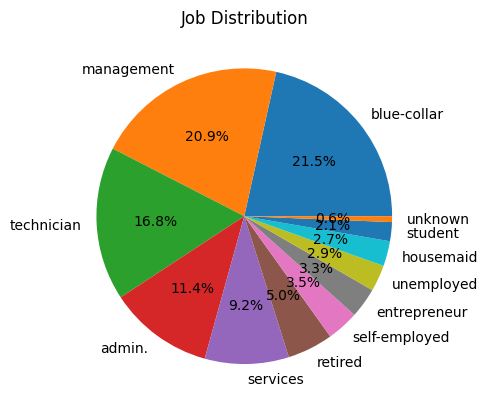

In [ ]:
#piechart for job
job_counts = data['job'].value_counts()  # Count occurrences of each job title
plt.pie(job_counts, labels=job_counts.index, autopct="%1.1f%%")  # Plot pie chart
plt.title("Job Distribution")
plt.show()

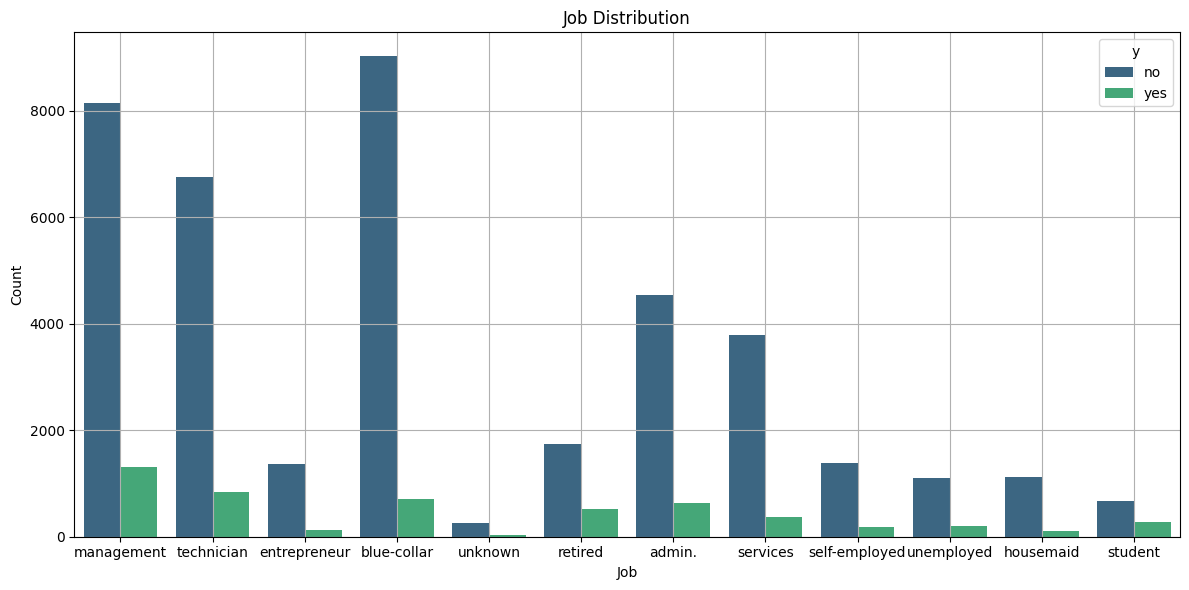

In [ ]:
#barplot for job
plt.figure(figsize=(12,6))
sns.countplot(x='job', hue='y', data=df, palette='viridis')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

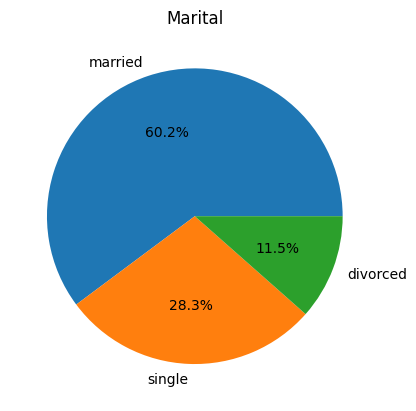

In [ ]:
#piechart for marital
marital = data['marital'].value_counts()  # Count occurrences of each job title
plt.pie(marital, labels=marital.index, autopct="%1.1f%%")  # Plot pie chart
plt.title("Marital")
plt.show()

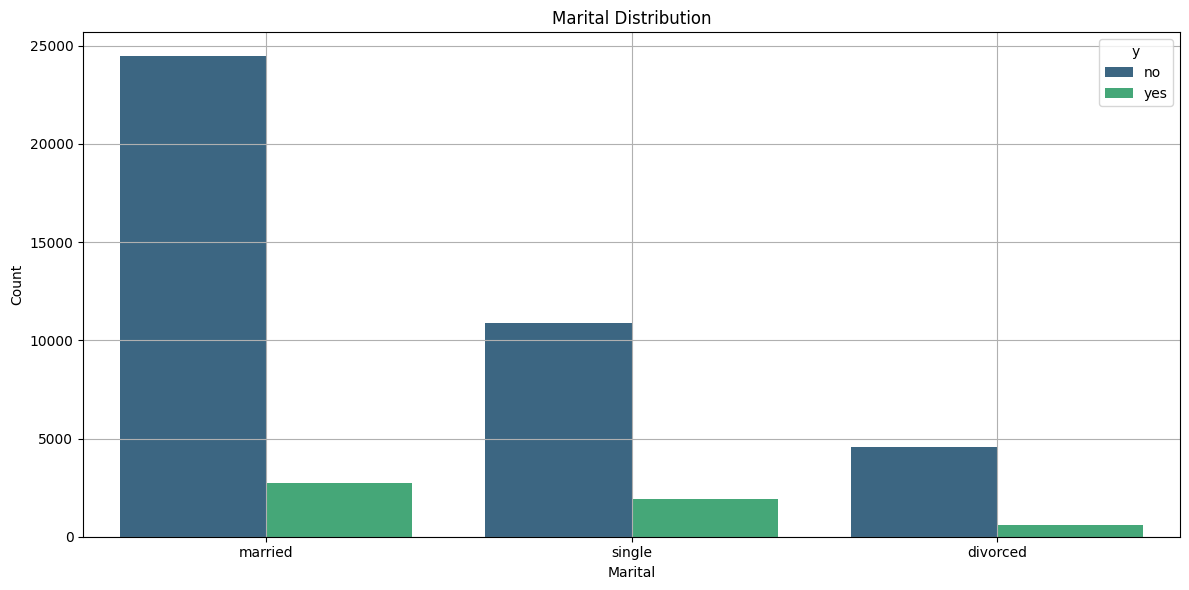

In [ ]:
#barplot for marital
plt.figure(figsize=(12,6))
sns.countplot(x='marital', hue='y', data=df, palette='viridis')
plt.title('Marital Distribution')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

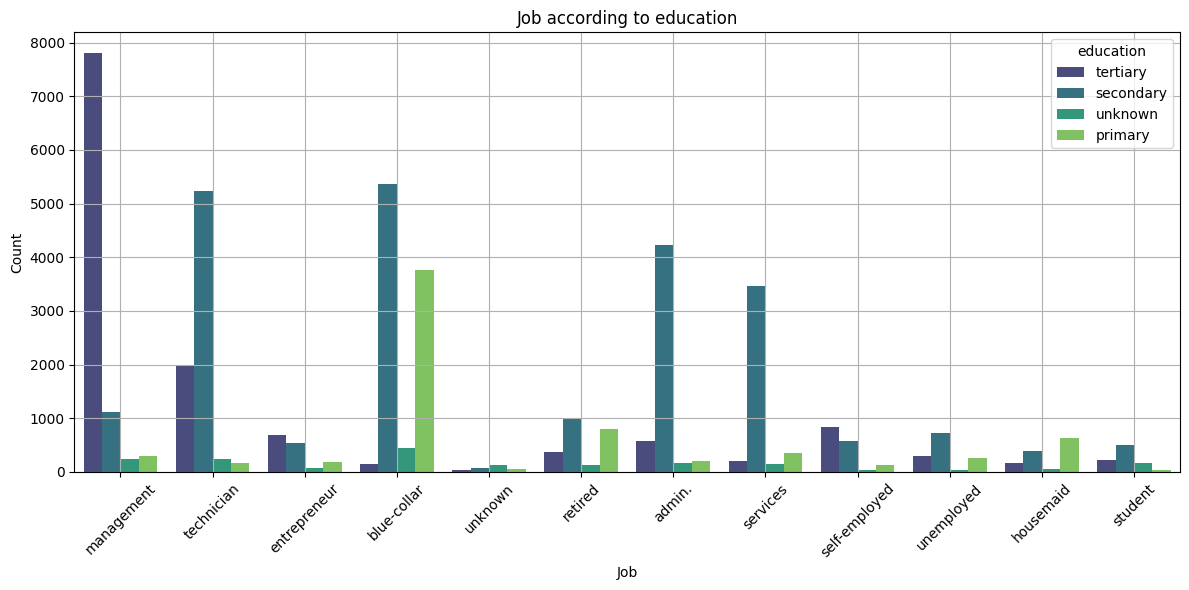

In [ ]:
#barplot for education
education_counts = df['education'].value_counts()
plt.figure(figsize=(12,6))
sns.countplot(x='job', hue='education', data=df, palette=sns.color_palette("viridis", len(education_counts)))
plt.title('Job according to education')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-56-32e1097ef1bb>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df.index, y='balance', data=df, palette='viridis')


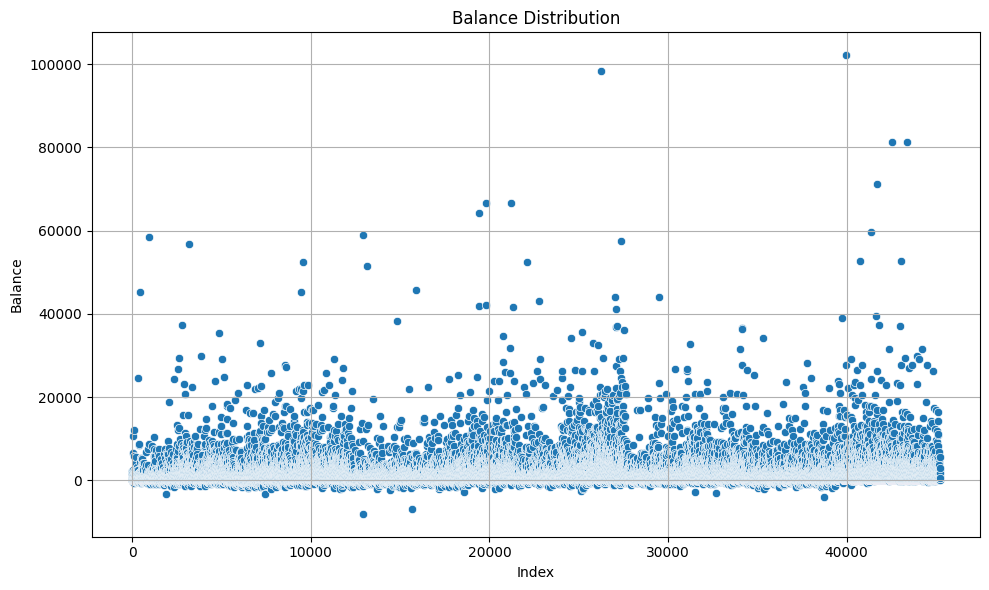

In [ ]:
#scatterplot for balance
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y='balance', data=df, palette='viridis')
plt.title('Balance Distribution')
plt.xlabel('Index')
plt.ylabel('Balance')
plt.grid(True)
plt.tight_layout()
plt.show()

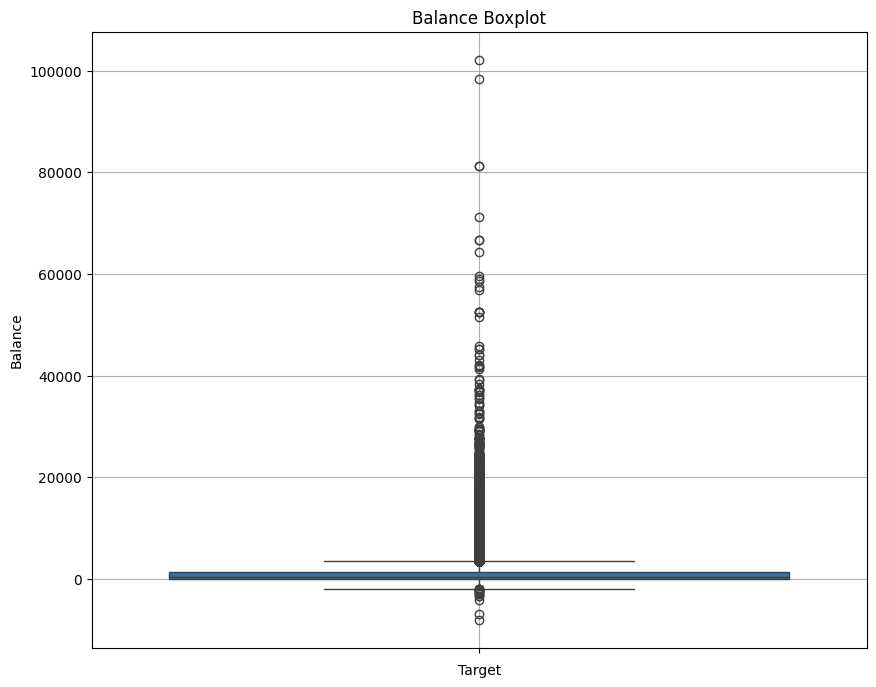

In [ ]:
#boxplot for balance
plt.figure(figsize=(10, 8))
sns.boxplot( y = 'balance',data=df)
plt.title('Balance Boxplot')
plt.xlabel('Target')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

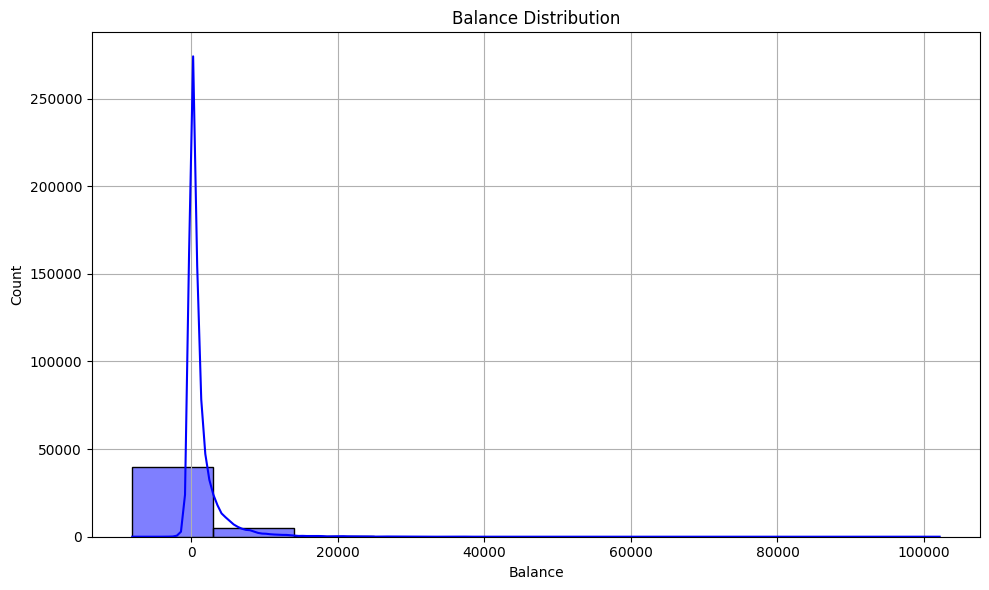

In [ ]:
#histogram for balance
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'],bins=10, kde=True,color='blue')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#count and percentages for default,housing,loan,y
def counts_and_percentages(column):
    counts = df[column].value_counts()
    percentages = df[column].value_counts(normalize=True) * 100
    return pd.DataFrame({'Count': counts, 'Percentage': percentages})

# Compute counts and percentages for each specified column
default_table = counts_and_percentages('default')
housing_table = counts_and_percentages('housing')
loan_table = counts_and_percentages('loan')
target_table = counts_and_percentages('y')

# Combine all tables into a single DataFrame for display
summary_table = pd.concat([default_table, housing_table, loan_table, target_table], axis=1, keys=['Default', 'Housing', 'Loan', 'Target'])

summary_table

Default            Housing              Loan            Target           
      Count Percentage   Count Percentage  Count Percentage  Count Percentage
no    44396  98.197341   20081  44.416182  37967  83.977351  39922   88.30152
yes     815   1.802659   25130  55.583818   7244  16.022649   5289   11.69848

In [ ]:
df = pd.DataFrame(data)
potential_categorical_columns = [col for col in df.columns if df[col].nunique() < 10]

# Apply label encoding to potential categorical columns
label_encoder = LabelEncoder()
for col in potential_categorical_columns:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

print("\nDataFrame after Label Encoding:")
print(df.head())
print(df.shape)


DataFrame after Label Encoding:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ... poutcome   y  marital_encoded  education_encoded  \
0  unknown    5  ...  unknown  no                1                  2   
1  unknown    5  ...  unknown  no                2                  1   
2  unknown    5  ...  unknown  no                1                  1   
3  unknown    5  ...  unknown  no                1                  3   
4  unknown    5  ...  unknown  no                2                  3   

   default_encoded housing_encoded loan_encoded  contact_encoded  \
0              

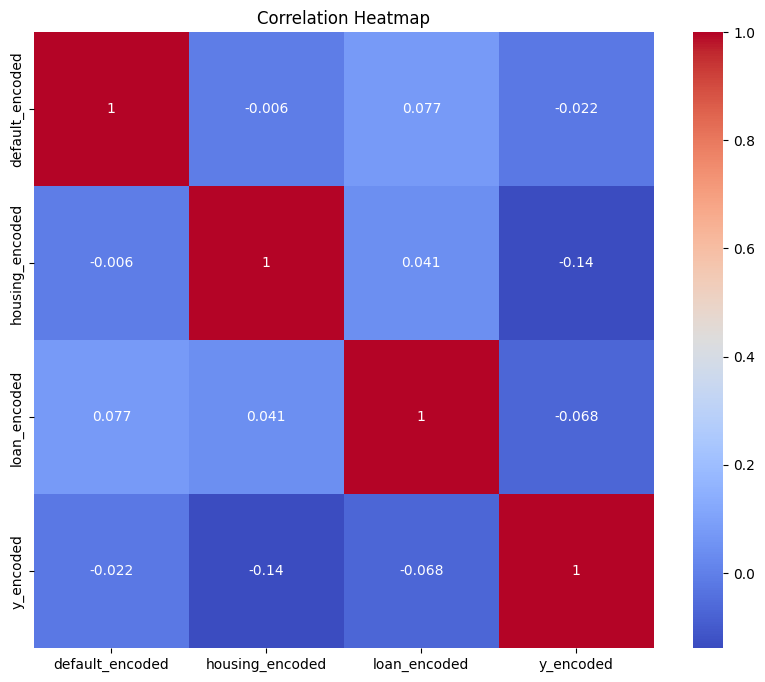

In [ ]:
#correlation between binary features
sel = ['default_encoded','housing_encoded','loan_encoded','y_encoded']
sub = df[sel]
ssub = sub.corr()
#print(ssub)
plt.figure(figsize=(10, 8))
sns.heatmap(ssub, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

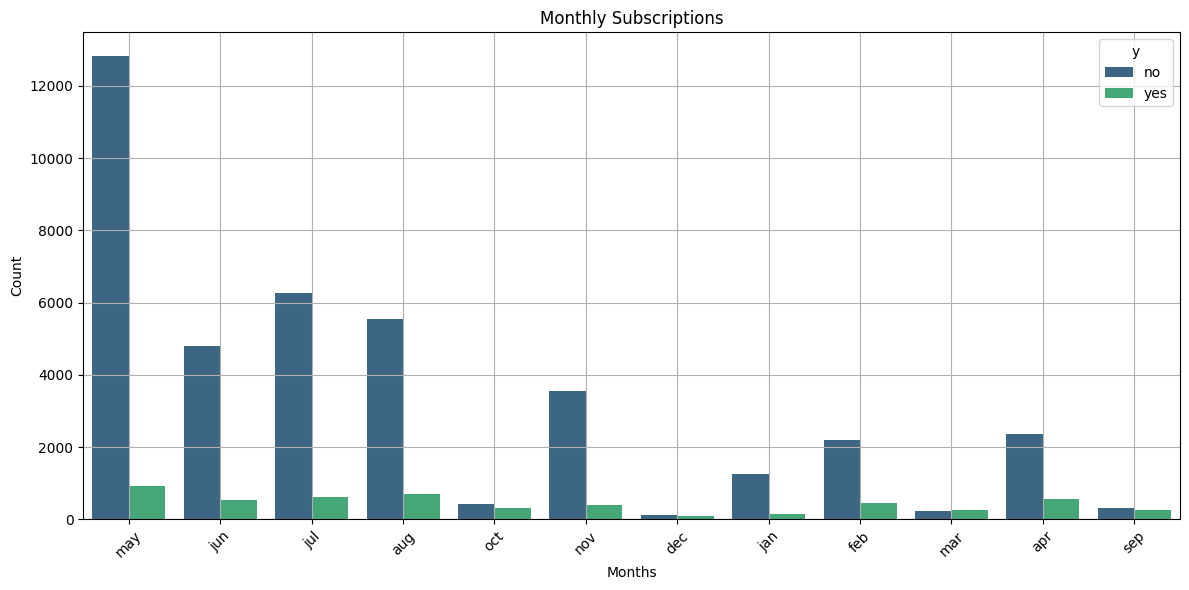

In [ ]:
#barplot for month
plt.figure(figsize=(12,6))
sns.countplot(x='month', hue='y', data=df, palette='viridis')
plt.title('Monthly Subscriptions')
plt.xlabel('Months')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

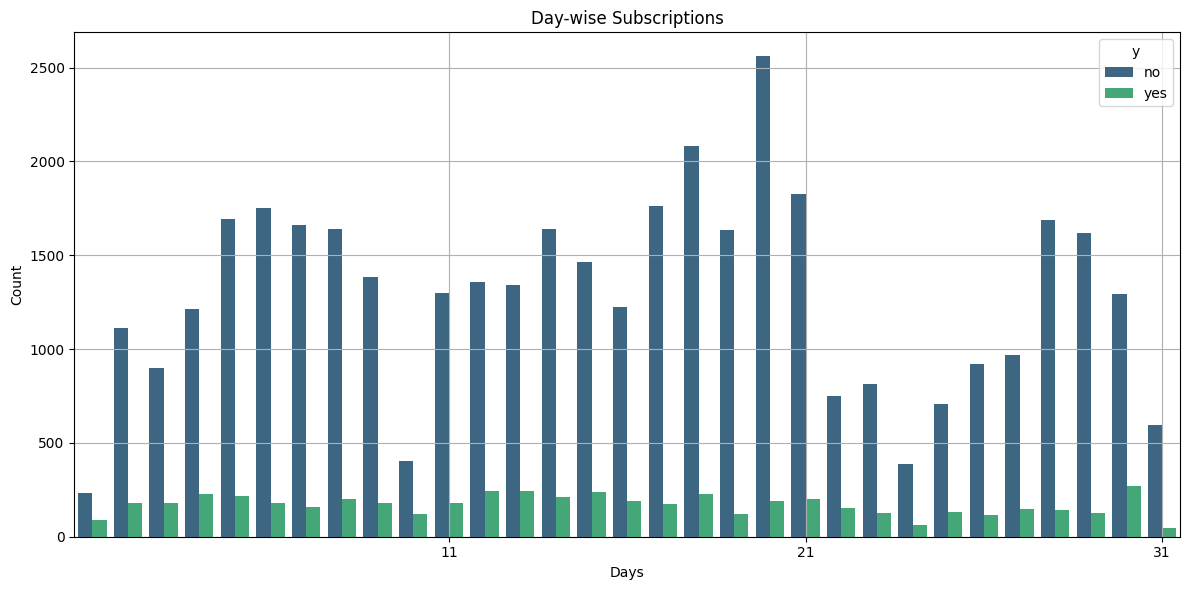

In [ ]:
#barplot for day
plt.figure(figsize=(12,6))
sns.countplot(x='day', hue='y', data=df, palette='viridis')
plt.title('Day-wise Subscriptions')
plt.xlabel('Days')
plt.ylabel('Count')
plt.xticks([10,20,30])
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

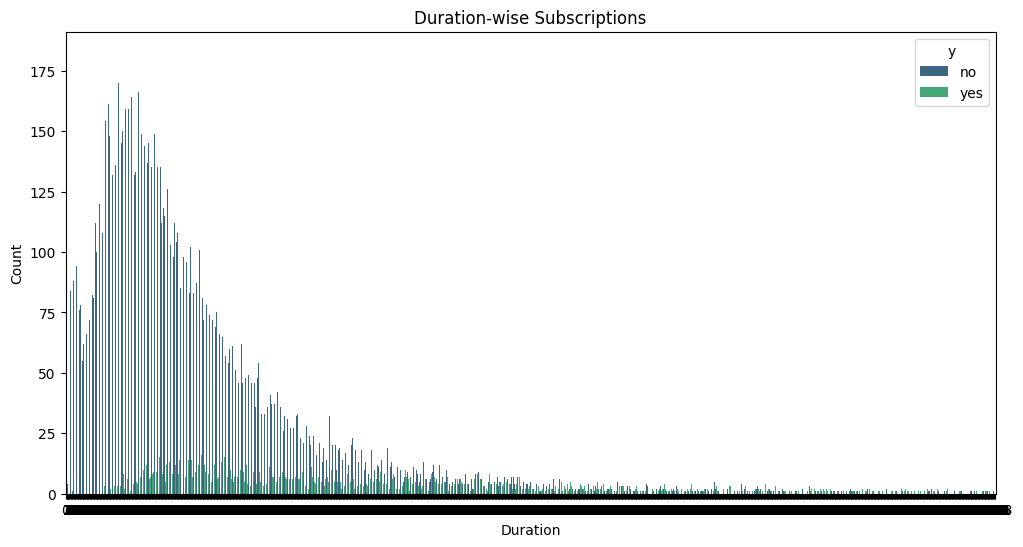

In [ ]:
#barplot for duration
plt.figure(figsize=(12,6))
sns.countplot(x='duration', hue='y', data=df, palette='viridis')
plt.title('Duration-wise Subscriptions')
plt.xlabel('Duration')
plt.ylabel('Count')

<ipython-input-24-3bca23f5ae31>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['y'] == 'no', 'duration'], label='No', shade=True)
<ipython-input-24-3bca23f5ae31>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['y'] == 'yes', 'duration'], label='Yes', shade=True)


<Axes: xlabel='duration', ylabel='Density'>

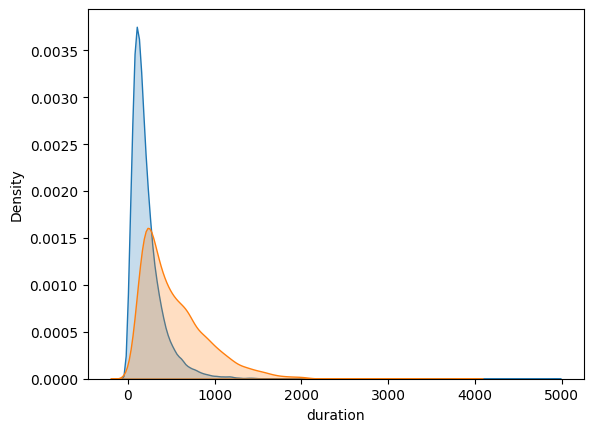

In [ ]:
#density of duration for different results
sns.kdeplot(df.loc[df['y'] == 'no', 'duration'], label='No', shade=True)
sns.kdeplot(df.loc[df['y'] == 'yes', 'duration'], label='Yes', shade=True)

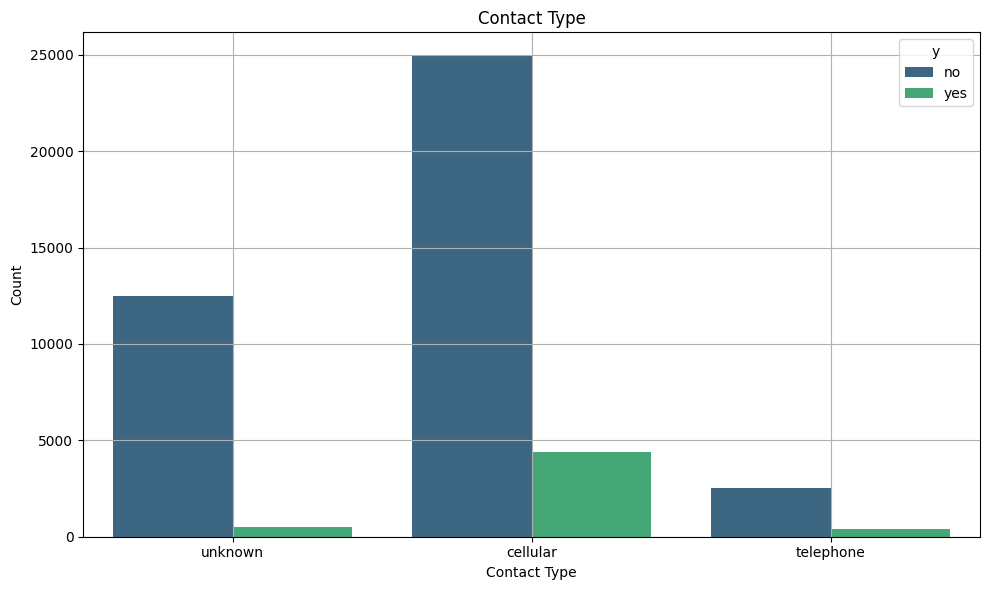

In [ ]:
#bar plot for contact
plt.figure(figsize=(10, 6))
sns.countplot(x='contact', hue='y', data=df, palette='viridis')
plt.title('Contact Type')
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

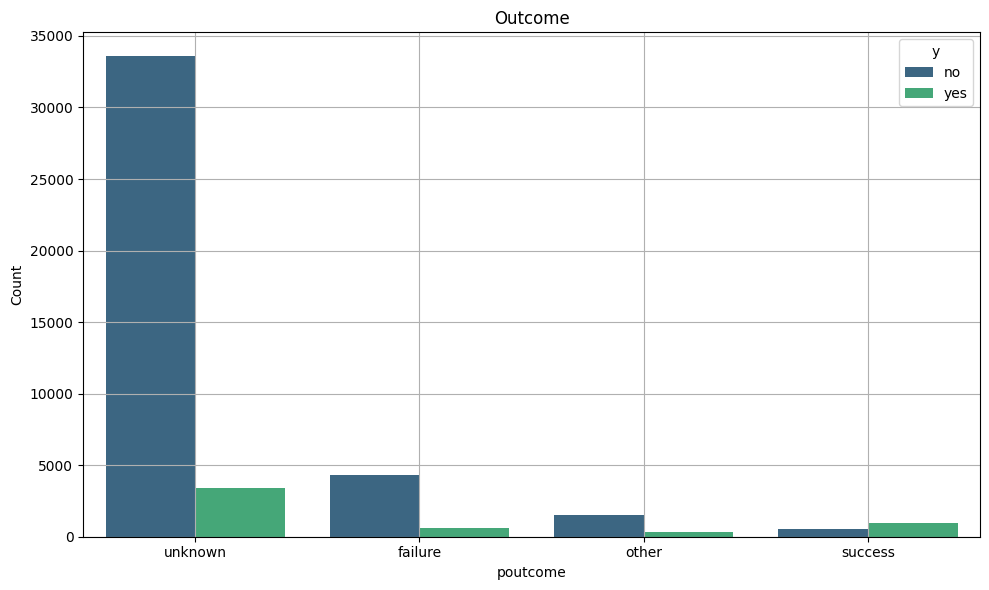

In [ ]:
#bar plot for poutcome
plt.figure(figsize=(10, 6))
sns.countplot(x='poutcome', hue='y', data=df, palette='viridis')
plt.title('Outcome')
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

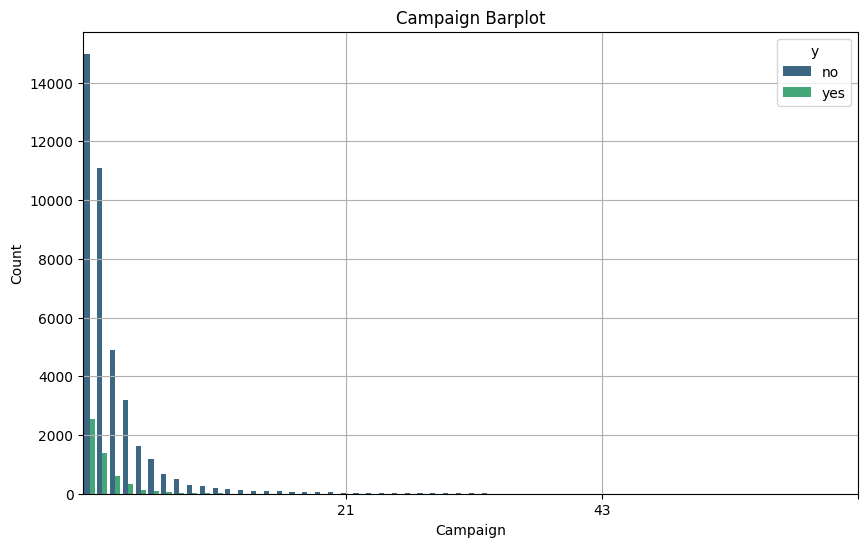

In [ ]:
#bar plot for campaign
plt.figure(figsize=(10, 6))
sns.countplot(x='campaign', hue='y', data=df, palette='viridis')
plt.title('Campaign Barplot')
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.xticks([20,40,60])
plt.grid(True)
plt.show()

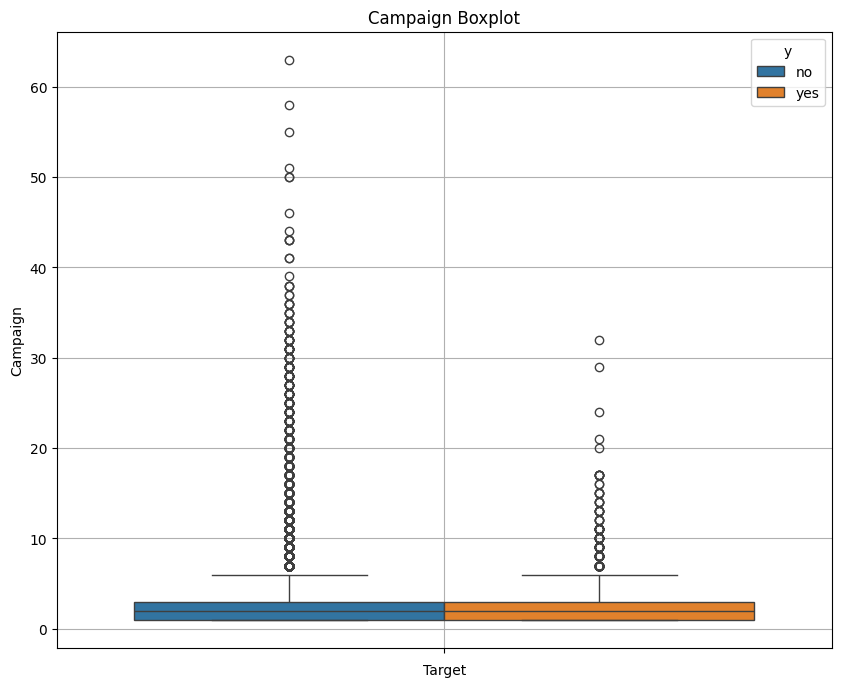

In [ ]:
#boxplot for campaign
plt.figure(figsize=(10, 8))
sns.boxplot( y = 'campaign',hue ='y',data=df)
plt.title('Campaign Boxplot')
plt.xlabel('Target')
plt.ylabel('Campaign')
plt.grid(True)
plt.show()

<ipython-input-20-2d5b4926ab61>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pdays', data=df, palette='viridis')


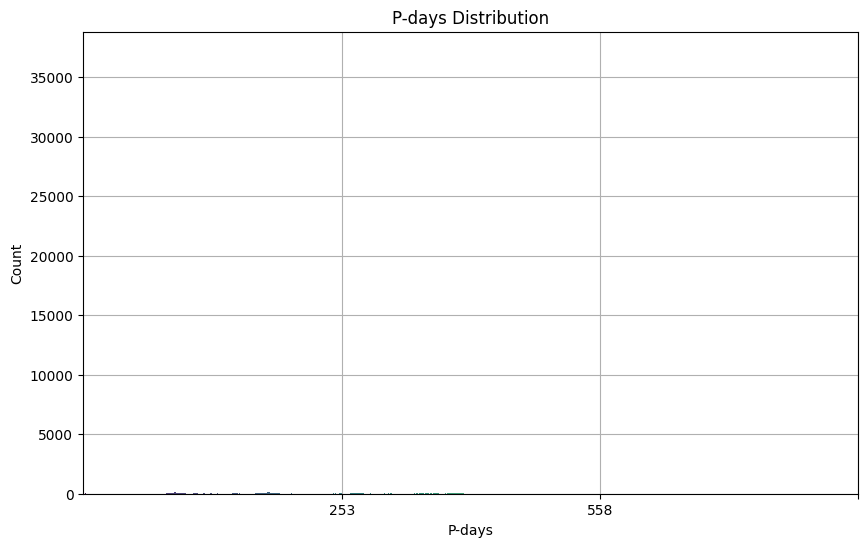

In [ ]:
#bar plot for p days
plt.figure(figsize=(10, 6))
sns.countplot(x='pdays', data=df, palette='viridis')
plt.title('P-days Distribution')
plt.xlabel('P-days')
plt.ylabel('Count')
plt.xticks([250,500,750])
plt.grid(True)
plt.show()

<ipython-input-19-9a8d81223a49>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pdays', data=filtered_df, palette='viridis')


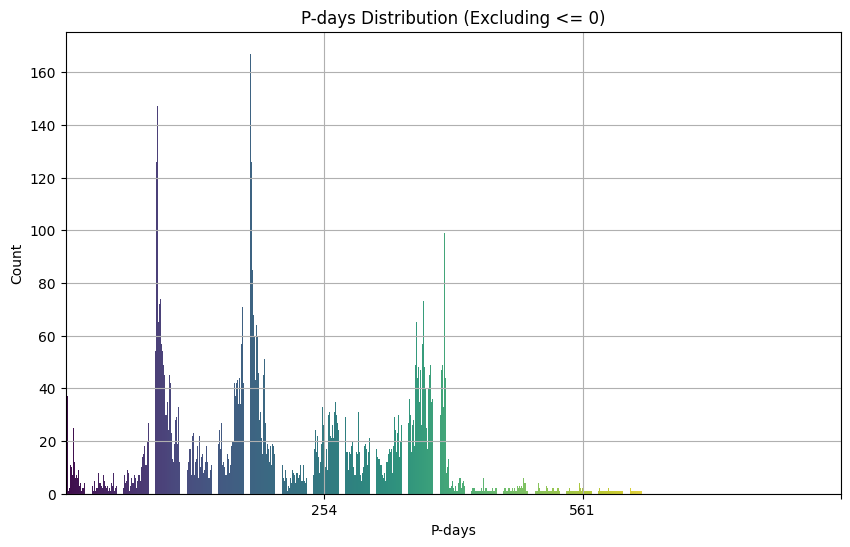

In [ ]:
#bar plot for p days with values excluding less than or equal to zero
filtered_df = df[df['pdays'] > 0]
plt.figure(figsize=(10, 6))
sns.countplot(x='pdays', data=filtered_df, palette='viridis')
plt.title('P-days Distribution (Excluding <= 0)')
plt.xlabel('P-days')
plt.ylabel('Count')
plt.xticks([250,500,750])
plt.grid(True)
plt.show()

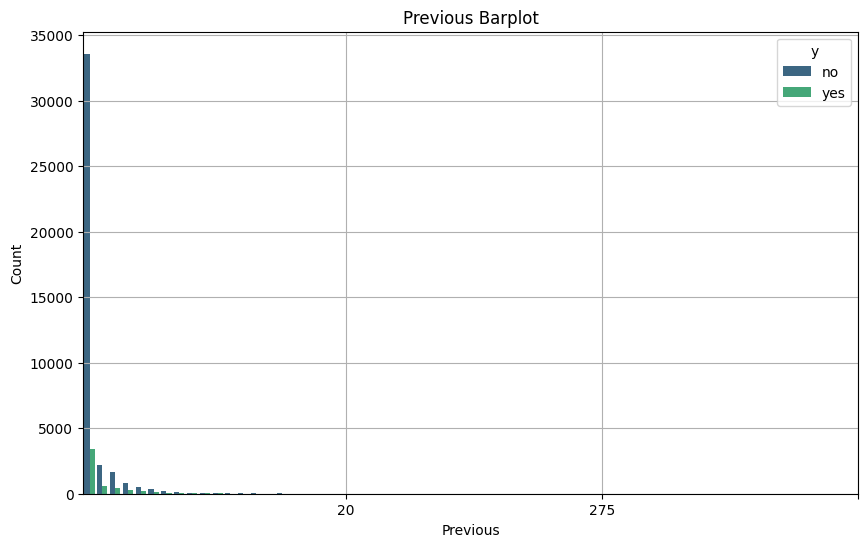

In [ ]:
#barplot for previous
plt.figure(figsize=(10, 6))
sns.countplot(x='previous', hue='y', data=df, palette='viridis')
plt.title('Previous Barplot')
plt.xlabel('Previous')
plt.ylabel('Count')
plt.xticks([20,40,60])
plt.grid(True)
plt.show()

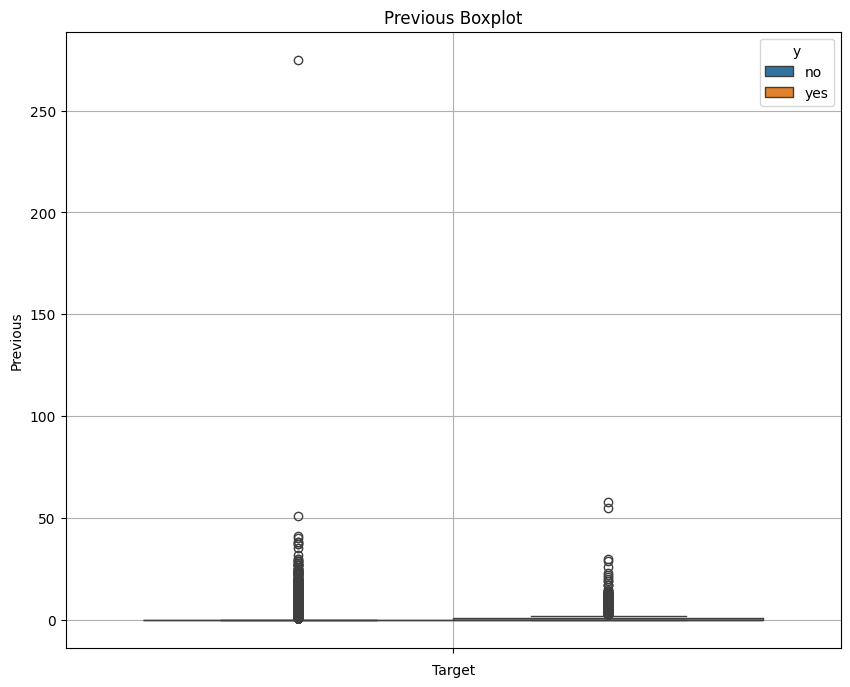

In [ ]:
#box plot for previous
plt.figure(figsize=(10, 8))
sns.boxplot( y = 'previous',hue ='y',data=df)
plt.title('Previous Boxplot')
plt.xlabel('Target')
plt.ylabel('Previous')
plt.grid(True)
plt.show()

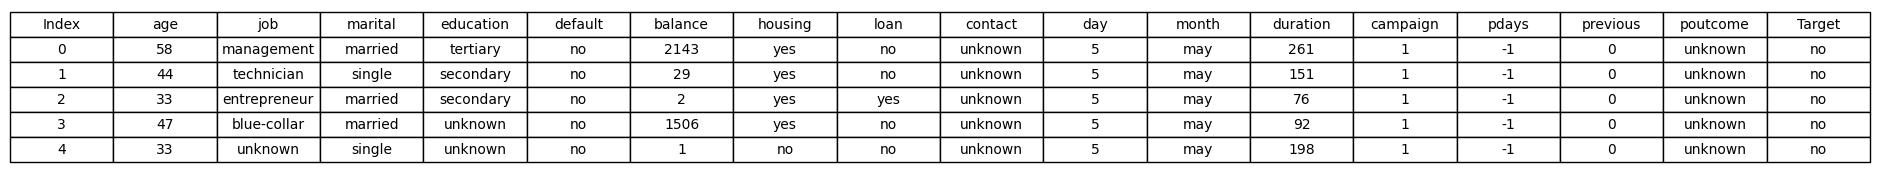

In [ ]:
data = hd.to_numpy()

# Set seaborn context for better visualization
sns.set_context("notebook",font_scale=1.5)
dt = data[:10]

# Create a table plot using matplotlib
fig, ax = plt.subplots(figsize=(10, 2))  # Adjust figsize to fit the table horizontally
ax.axis('tight')
ax.axis('off')

# Create a table with cellText as the NumPy array and colLabels as the DataFrame columns
table = ax.table(cellText=dt, colLabels=hd.columns, cellLoc='center', loc='center')

# Adjust table properties to improve visualization
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2.4, 1.5)

plt.show()

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'marital_encoded', 'education_encoded',
       'default_encoded', 'housing_encoded', 'loan_encoded', 'contact_encoded',
       'poutcome_encoded', 'y_encoded'],
      dtype='object')

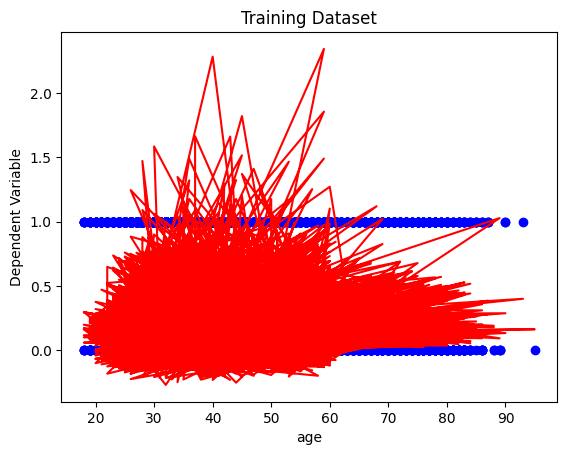

In [ ]:
#plot for training dataset(AGE)
plt.scatter(x_train['age'],y_train,color='blue')
plt.plot(x_train['age'],model.predict(x_train),color='red')
plt.title('Training Dataset')
plt.xlabel('age')
plt.ylabel('Dependent Variable')
plt.show()

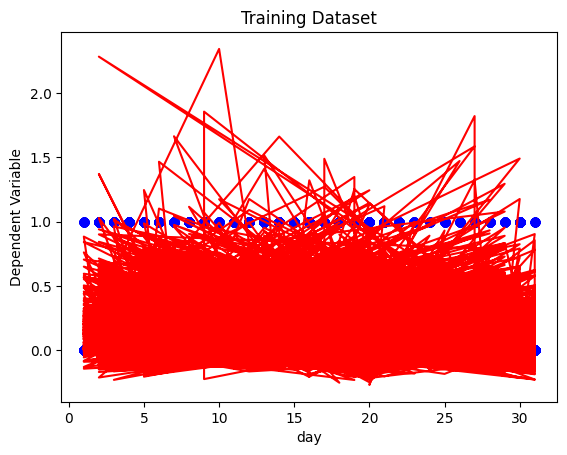

In [ ]:
#plot for training dataset(DAY)
plt.scatter(x_train['day'],y_train,color='blue')
plt.plot(x_train['day'],model.predict(x_train),color='red')
plt.title('Training Dataset')
plt.xlabel('day')
plt.ylabel('Dependent Variable')
plt.show()

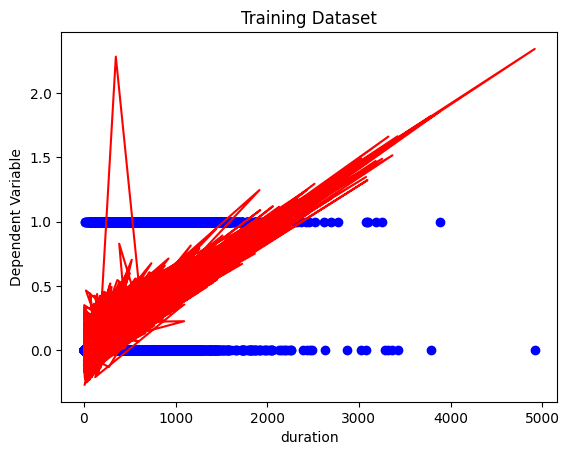

In [ ]:
#plot for training dataset(DURATION)
plt.scatter(x_train['duration'],y_train,color='blue')
plt.plot(x_train['duration'],model.predict(x_train),color='red')
plt.title('Training Dataset')
plt.xlabel('duration')
plt.ylabel('Dependent Variable')
plt.show()

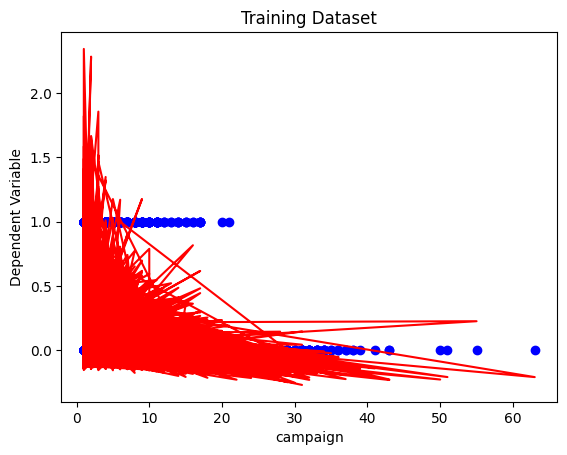

In [ ]:
#plot for training dataset(CAMPAIGN)
plt.scatter(x_train['campaign'],y_train,color='blue')
plt.plot(x_train['campaign'],model.predict(x_train),color='red')
plt.title('Training Dataset')
plt.xlabel('campaign')
plt.ylabel('Dependent Variable')
plt.show()

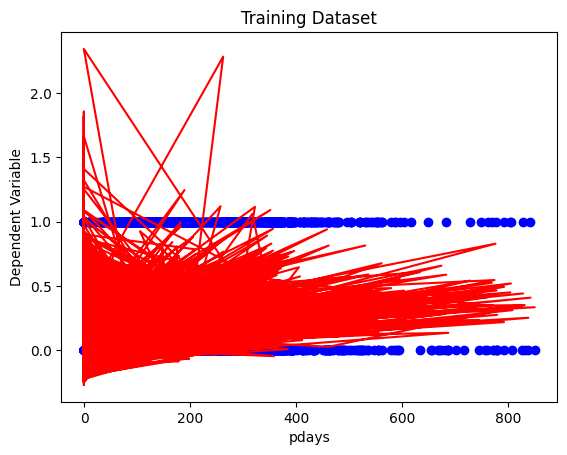

In [ ]:
#plot for training dataset(PDAYS)
plt.scatter(x_train['pdays'],y_train,color='blue')
plt.plot(x_train['pdays'],model.predict(x_train),color='red')
plt.title('Training Dataset')
plt.xlabel('pdays')
plt.ylabel('Dependent Variable')
plt.show()

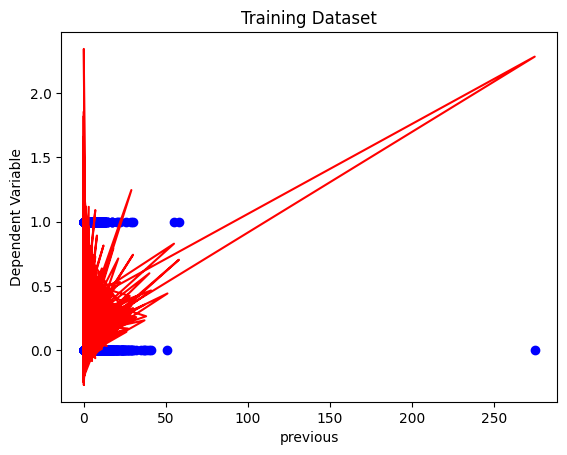

In [ ]:
#plot for training dataset(PREVIOUS)
plt.scatter(x_train['previous'],y_train,color='blue')
plt.plot(x_train['previous'],model.predict(x_train),color='red')
plt.title('Training Dataset')
plt.xlabel('previous')
plt.ylabel('Dependent Variable')
plt.show()

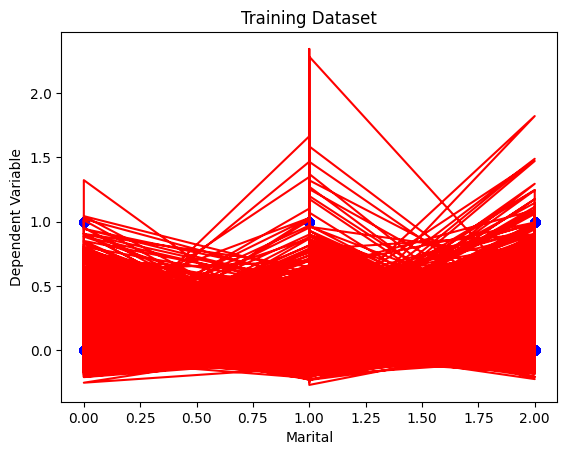

In [ ]:
#plot for training dataset(MARITAL_ENCODED)
plt.scatter(x_train['marital_encoded'],y_train,color='blue')
plt.plot(x_train['marital_encoded'],model.predict(x_train),color='red')
plt.title('Training Dataset')
plt.xlabel('Marital')
plt.ylabel('Dependent Variable')
plt.show()

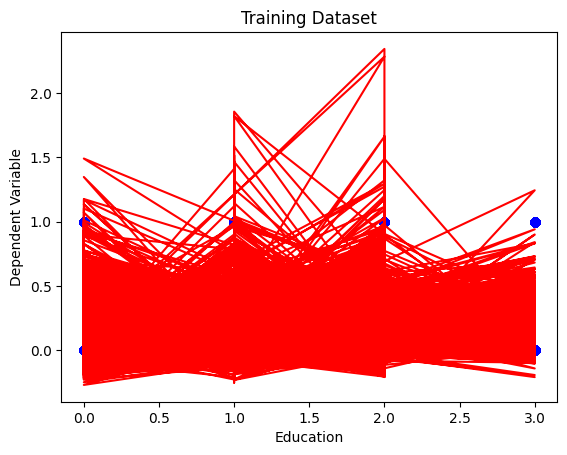

In [ ]:
#plot for training dataset(EDUCATION_ENCODED)
plt.scatter(x_train['education_encoded'],y_train,color='blue')
plt.plot(x_train['education_encoded'],model.predict(x_train),color='red')
plt.title('Training Dataset')
plt.xlabel('Education')
plt.ylabel('Dependent Variable')
plt.show()

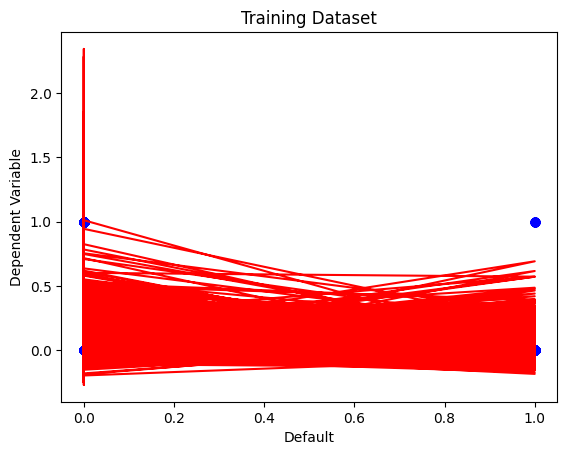

In [ ]:
#plot for training dataset(DEFAULT_ENCODED)
plt.scatter(x_train['default_encoded'],y_train,color='blue')
plt.plot(x_train['default_encoded'],model.predict(x_train),color='red')
plt.title('Training Dataset')
plt.xlabel('Default')
plt.ylabel('Dependent Variable')
plt.show()

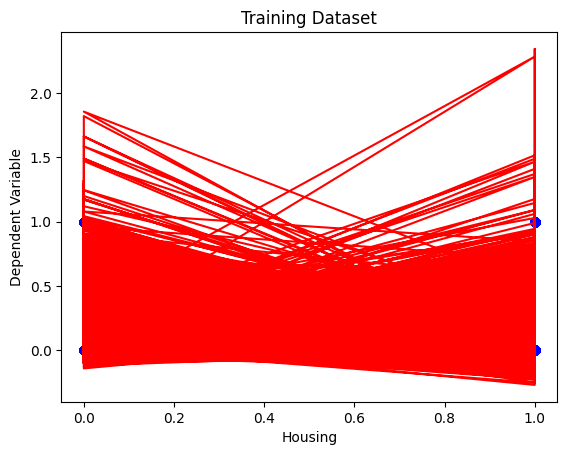

In [ ]:
#plot for training dataset(HOUSING_ENCODED)
plt.scatter(x_train['housing_encoded'],y_train,color='blue')
plt.plot(x_train['housing_encoded'],model.predict(x_train),color='red')
plt.title('Training Dataset')
plt.xlabel('Housing')
plt.ylabel('Dependent Variable')
plt.show()

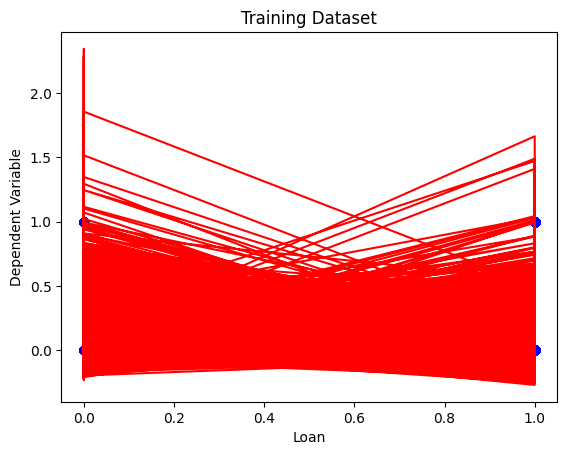

In [ ]:
#plot for training dataset
plt.scatter(x_train['loan_encoded'],y_train,color='blue')
plt.plot(x_train['loan_encoded'],model.predict(x_train),color='red')
plt.title('Training Dataset')
plt.xlabel('Loan')
plt.ylabel('Dependent Variable')
plt.show()

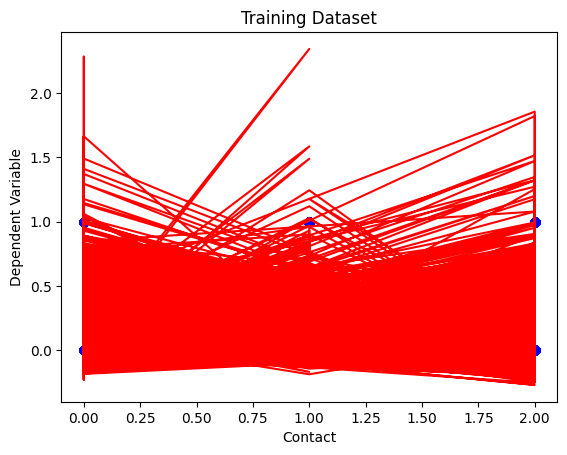

In [ ]:
#plot for training dataset(CONTACT_ENCODED)
plt.scatter(x_train['contact_encoded'],y_train,color='blue')
plt.plot(x_train['contact_encoded'],model.predict(x_train),color='red')
plt.title('Training Dataset')
plt.xlabel('Contact')
plt.ylabel('Dependent Variable')
plt.show()

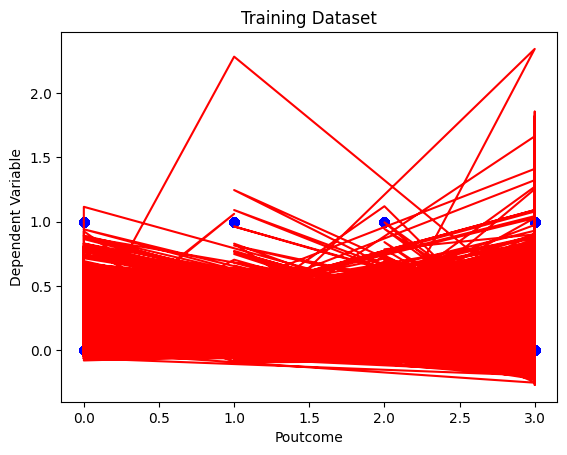

In [ ]:
#plot for training dataset(POUTCOME_ENCODED)
plt.scatter(x_train['poutcome_encoded'],y_train,color='blue')
plt.plot(x_train['poutcome_encoded'],model.predict(x_train),color='red')
plt.title('Training Dataset')
plt.xlabel('Poutcome')
plt.ylabel('Dependent Variable')
plt.show()

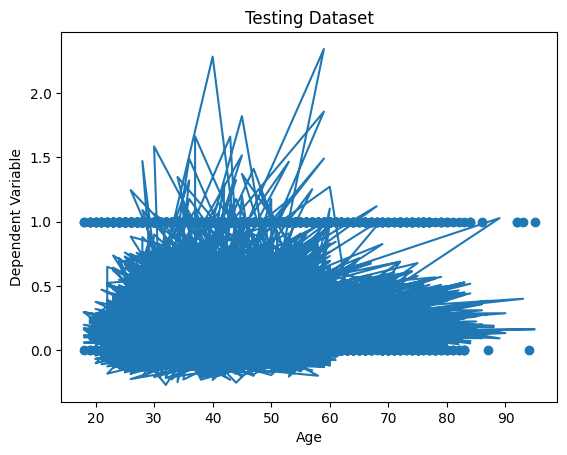

In [ ]:
#plot for testing dataset(AGE)
plt.scatter(x_test['age'],y_test)
plt.plot(x_train['age'],model.predict(x_train))
plt.title('Testing Dataset')
plt.xlabel('Age')
plt.ylabel('Dependent Variable')
plt.show()

In [ ]:
# Independent variables (excluding original categorical columns and original target variable)
x = df.drop(columns=['y', 'y_encoded', 'job', 'marital', 'education', 'default',
                       'housing', 'loan', 'contact', 'poutcome','month'])
#assigning dependent and independent variables
y = df['y_encoded']

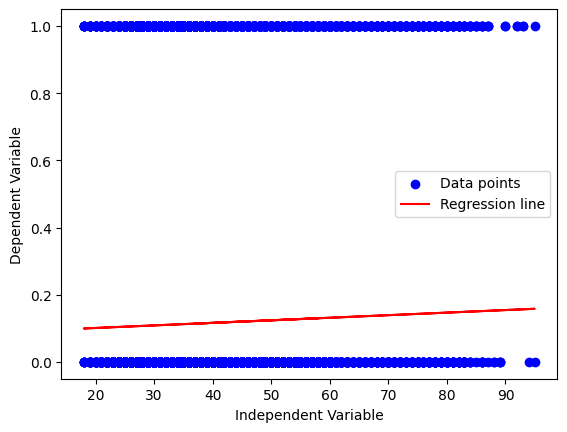

In [ ]:
x=x['age']#here you can change variable and lor as you want for all required variables
m,b = np.polyfit(x,y,1)
plt.scatter(x, y, color='blue', label='Data points')

# Plotting the regression line
plt.plot(x, m*x + b, color='red', label='Regression line')

# Adding labels and legend
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.legend()

# Show the plot
plt.show()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(36168, 14)
(9043, 14)
(9043,)
(36168,)


In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)

[-0.00354497  0.05379899  0.1000324  ... -0.01002133 -0.07619995
  0.06104066]
3776     0
9928     0
33409    0
31885    0
15738    0
        ..
13353    0
38732    1
5654     0
3779     0
11677    0
Name: y_encoded, Length: 9043, dtype: int64


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
# Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
# R² Score
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 0.18339787233210691
MSE: 0.08340503341958966
RMSE: 0.2887992960856893
R²: 0.21383048304027663


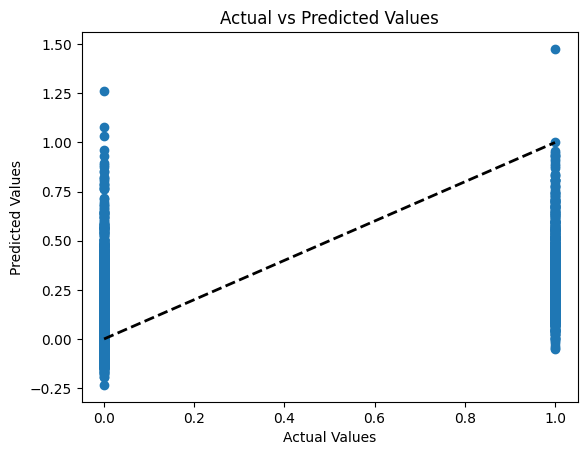

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [ ]:
import joblib

joblib.dump(model, 'LRMajorProject.pkl')


['LRMajorProject.pkl']